In [1]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as mtick
import sys
from datetime import datetime as dt

In [2]:
# Read in files from the current working directory.
wave1 = pd.read_csv('Wave1_Data_v9.csv')
wave2 = pd.read_csv('Wave2_Data_v9.csv')
wave3 = pd.read_csv('Wave3_Data_v7.csv')
wave4 = pd.read_csv('Wave4_Data_v4.csv')
wave5 = pd.read_csv('Wave5_Data_v3.csv')
wave6 = pd.read_csv('Wave 6_Data_v3.csv')
wave7 = pd.read_csv('Wave 7_Data_v5.csv')
wave8 = pd.read_csv('Wave 8_Data_v2.csv')

C:\Users\ciaraw\AppData\Local\Temp\ipykernel_20352\2277216682.py:5: DtypeWarning: Columns (9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  wave4 = pd.read_csv('Wave4_Data_v4.csv')


In [3]:
All = pd.concat([wave1, wave2, wave3, wave4, wave5, wave6, wave7, wave8])

In [4]:
All.head()

,Wave,Scope,Question_Code,Question_Label,BaseValue,Value,BreakType,BreakGroup,SubGroup,Weighted_Base,...,Unweighted_Count,Rate,Rate_CI,Rate_LowerCI,Rate_UpperCI,Mean,Mean_Variance,Mean_CI,Mean_LowerCI,Mean_UpperCI
0,1,Adult,Q1_Days30Mod_GR2,"Q1. In the past week, on how many days have yo...",All adults,NET: 1+ days,Demographic,All adults,Adult,2190.0,...,1625.0,80.37%,1.71%,78.66%,82.08%,NaN,NaN,NaN,NaN,NaN
1,1,Adult,Q1_Days30Mod_GR3,"Q1. In the past week, on how many days have yo...",All adults,NET: 3+ days,Demographic,All adults,Adult,2190.0,...,1105.0,55.24%,2.15%,53.09%,57.39%,NaN,NaN,NaN,NaN,NaN
2,1,Adult,Q1_Days30Mod_GR4,"Q1. In the past week, on how many days have yo...",All adults,0 days,Demographic,All adults,Adult,2190.0,...,436.0,19.63%,1.71%,17.92%,21.34%,NaN,NaN,NaN,NaN,NaN
3,1,Adult,Q1_Days30Mod_GR4,"Q1. In the past week, on how many days have yo...",All adults,1-2 days,Demographic,All adults,Adult,2190.0,...,520.0,25.12%,1.87%,23.25%,26.99%,NaN,NaN,NaN,NaN,NaN
4,1,Adult,Q1_Days30Mod_GR4,"Q1. In the past week, on how many days have yo...",All adults,3-4 days,Demographic,All adults,Adult,2190.0,...,553.0,26.95%,1.92%,25.03%,28.87%,NaN,NaN,NaN,NaN,NaN


In [5]:
for col in All.columns:
    print(col)

Wave
 Scope
 Question_Code
 Question_Label
 BaseValue
 Value
 BreakType
 BreakGroup
 SubGroup
 Weighted_Base
 Unweighted_Base
 Weighted_Count
 Unweighted_Count
 Rate
 Rate_CI
 Rate_LowerCI
 Rate_UpperCI
 Mean
 Mean_Variance
 Mean_CI
 Mean_LowerCI
 Mean_UpperCI


In [6]:
All[' Rate (%)'] = All[' Rate'].str.rstrip('%').astype('float')

In [7]:
All[' Rate'] = All[' Rate'].str.rstrip('%').astype('float')/100
All[' Rate_CI'] = All[' Rate_CI'].str.rstrip('%').astype('float')/100 
All[' Rate_LowerCI'] = All[' Rate_LowerCI'].str.rstrip('%').astype('float')/100 
All[' Rate_UpperCI'] = All[' Rate_UpperCI'].str.rstrip('%').astype('float')/100 
All['Wave'] = All['Wave'].astype('object')

In [8]:
# Set the figure size.
sns.set(rc={'figure.figsize':(15, 8)})

# Set the tick style.
sns.set_style('ticks')

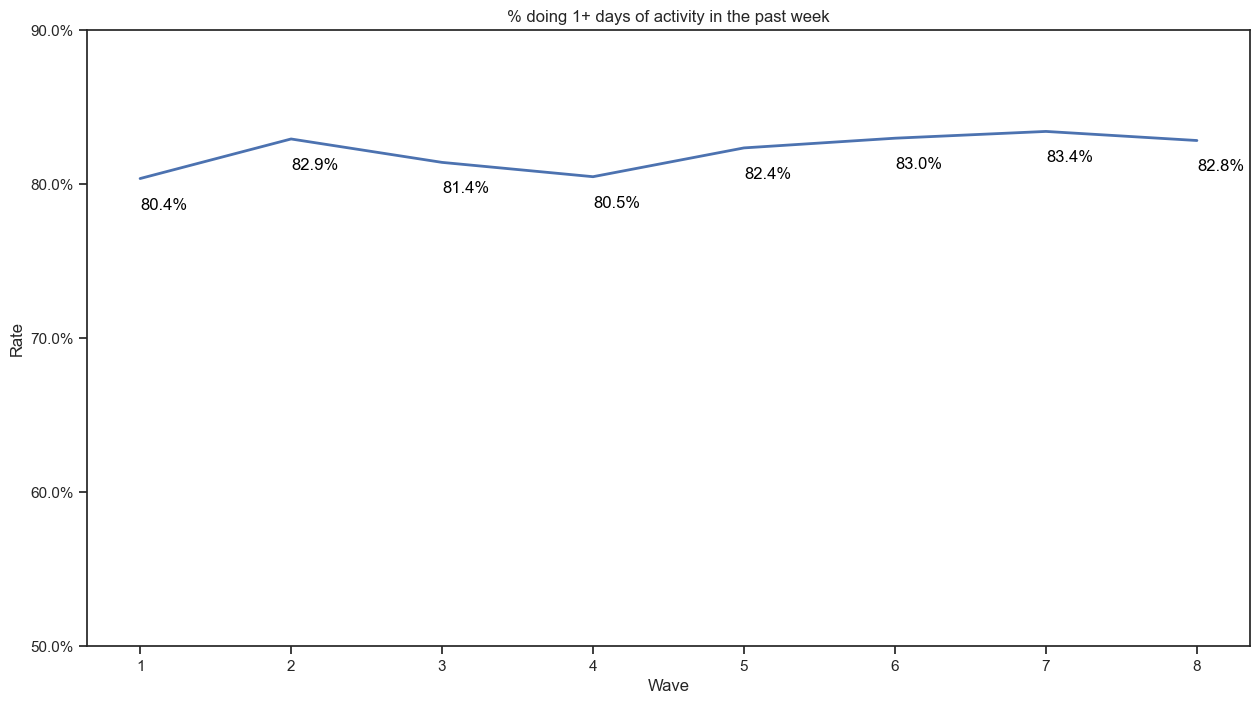

In [9]:
Q1 = All[(All[' Question_Code']=='Q1_Days30Mod_GR2') & (All[' SubGroup'] == 'Adult')].reset_index()

# Create a lineplot with Seaborn
ax = sns.lineplot(x='Wave', 
             y=' Rate', 
              linewidth=2,
              data=Q1).set_title("% doing 1+ days of activity in the past week")
               
    # label points on the plot
for x, y in zip(Q1['Wave'], Q1[' Rate']):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y-0.02, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = '{:.1%}'.format(y), # data label, formatted to ignore decimals
     color = 'black') # set colour of line

plt.xlabel("Wave")
plt.ylabel("Rate")
ytick_labels = [0.5, 0.6, 0.7, 0.8, 0.9]
ytick_positions = [0.5, 0.6, 0.7, 0.8, 0.9]
plt.yticks(ytick_positions, ytick_labels)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.show()

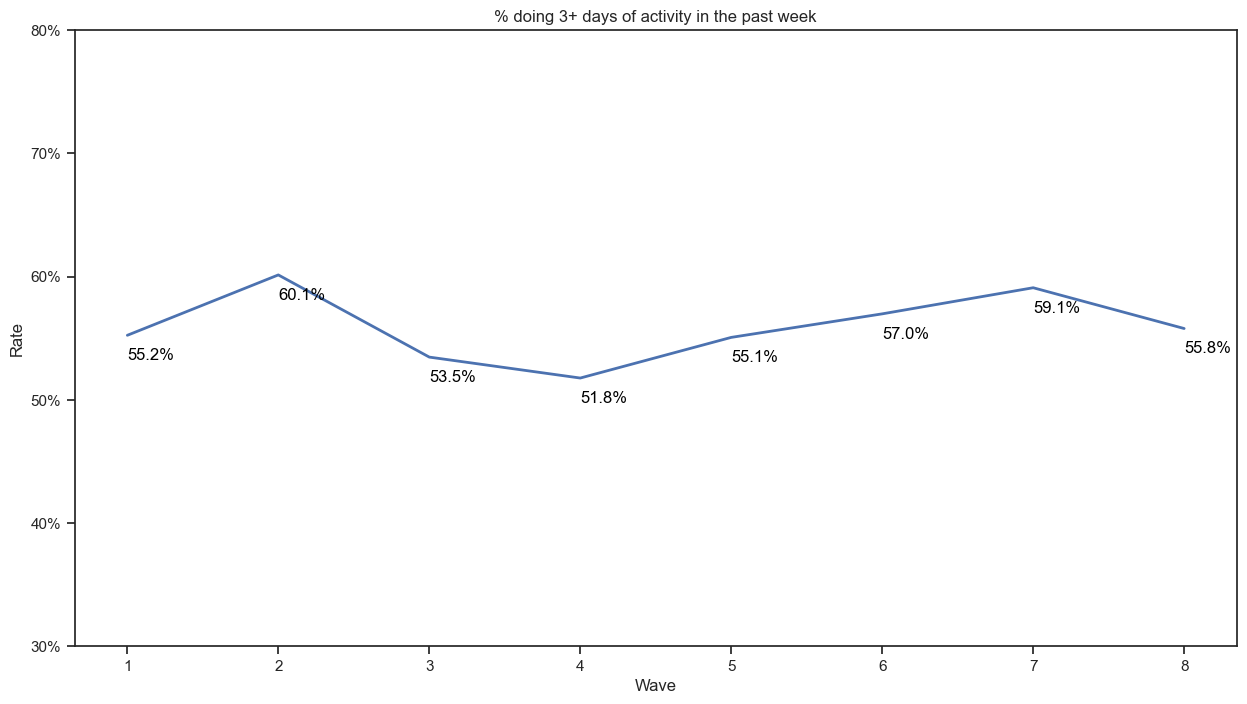

In [10]:
Q1_GR3 = All[(All[' Question_Code']=='Q1_Days30Mod_GR3') & (All[' SubGroup'] == 'Adult')].reset_index()

# Create a lineplot with Seaborn
ax = sns.lineplot(x='Wave', 
             y=' Rate', 
              linewidth=2,
              data=Q1_GR3).set_title("% doing 3+ days of activity in the past week")

                  # label points on the plot
for x, y in zip(Q1['Wave'], Q1_GR3[' Rate']):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y-0.02, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = '{:.1%}'.format(y), # data label, formatted to ignore decimals
     color = 'black') # set colour of line

plt.xlabel("Wave")
plt.ylabel("Rate")
ytick_labels = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
ytick_positions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
plt.yticks(ytick_positions, ytick_labels)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.show()

In [11]:
Q1_GR3

,index,Wave,Scope,Question_Code,Question_Label,BaseValue,Value,BreakType,BreakGroup,SubGroup,...,Rate,Rate_CI,Rate_LowerCI,Rate_UpperCI,Mean,Mean_Variance,Mean_CI,Mean_LowerCI,Mean_UpperCI,Rate (%)
0,1,1,Adult,Q1_Days30Mod_GR3,"Q1. In the past week, on how many days have yo...",All adults,NET: 3+ days,Demographic,All adults,Adult,...,0.5524,0.0215,0.5309,0.5739,NaN,NaN,NaN,NaN,NaN,55.24
1,1,2,Adult,Q1_Days30Mod_GR3,"Q1. In the past week, on how many days have yo...",All adults,NET: 3+ days,Demographic,All adults,Adult,...,0.6014,0.0193,0.5821,0.6207,NaN,NaN,NaN,NaN,NaN,60.14
2,1,3,Adult,Q1_Days30Mod_GR3,"Q1. In the past week, on how many days have yo...",All adults,NET: 3+ days,Demographic,All adults,Adult,...,0.5347,0.0217,0.5130,0.5564,NaN,NaN,NaN,NaN,NaN,53.47
3,1,4,Adult,Q1_Days30Mod_GR3,"Q1. In the past week, on how many days have yo...",All adults,NET: 3+ days,Demographic,All adults,Adult,...,0.5177,0.0210,0.4967,0.5387,NaN,NaN,NaN,NaN,NaN,51.77
4,1,5,Adult,Q1_Days30Mod_GR3,"Q1. In the past week, on how many days have yo...",All adults,NET: 3+ days,Demographic,All adults,Adult,...,0.5507,0.0214,0.5293,0.5721,NaN,NaN,NaN,NaN,NaN,55.07
5,1,6,Adult,Q1_Days30Mod_GR3,"Q1. In the past week, on how many days have yo...",All adults,NET: 3+ days,Demographic,All adults,Adult,...,0.5698,0.0213,0.5485,0.5911,NaN,NaN,NaN,NaN,NaN,56.98
6,1,7,Adult,Q1_Days30Mod_GR3,"Q1. In the past week, on how many days have yo...",All adults,NET: 3+ days,Demographic,All adults,Adult,...,0.5910,0.0209,0.5701,0.6119,NaN,NaN,NaN,NaN,NaN,59.10
7,1,8,Adult,Q1_Days30Mod_GR3,"Q1. In the past week, on how many days have yo...",All adults,NET: 3+ days,Demographic,All adults,Adult,...,0.5579,0.0204,0.5375,0.5783,NaN,NaN,NaN,NaN,NaN,55.79


In [12]:
colours = ('#003F69', '#e41b4a', '#0072d6', '#a4569c', '#00a881', '#ff6105')

In [13]:
# Set the figure size.
sns.set(rc={'figure.figsize':(13, 7)})

# Set the tick style.
sns.set_style('ticks')
sns.set(font_scale=1.1)

<ErrorbarContainer object of 3 artists>

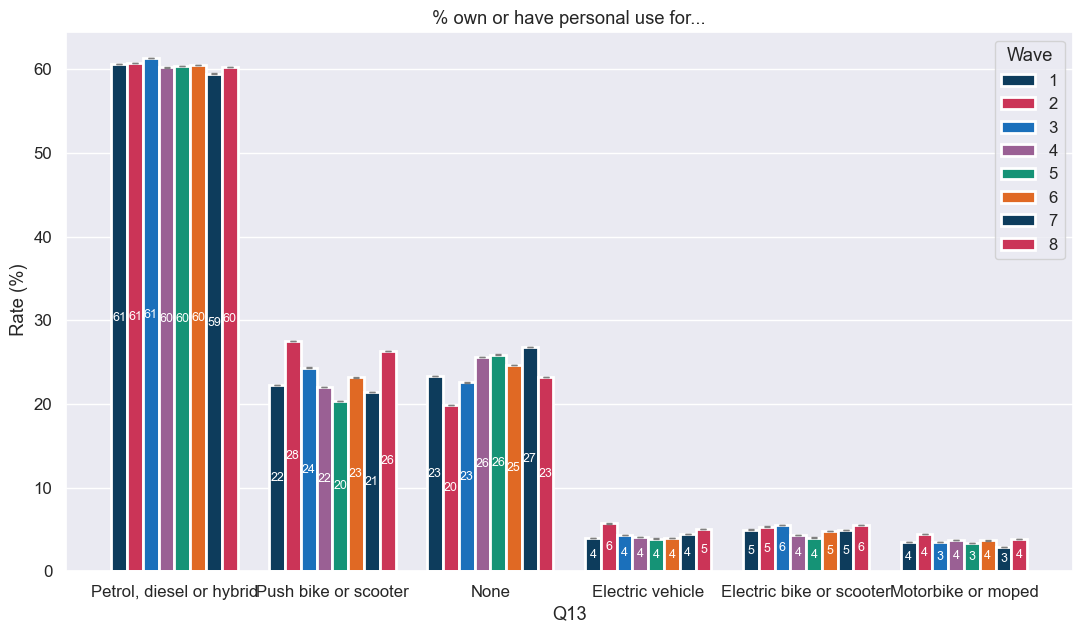

In [14]:
Q13 = All[All[' Question_Code'].str.contains("Q13_") & (All[' Value'] == 'Yes')\
          & (All[' SubGroup'] == 'Adult')].reset_index()
Q13 = Q13.sort_values(by=' Rate', ascending=False)

Q13['Q13'] = Q13[' Question_Code'].map({
'Q13_Vehicles_Electric' : 'Electric vehicle',
'Q13_Vehicles_Petrol' : 'Petrol, diesel or hybrid',
'Q13_Vehicles_Motorbike' : 'Motorbike or moped',
'Q13_Vehicles_eBike' : 'Electric bike or scooter',
'Q13_Vehicles_PushBike' : 'Push bike or scooter',
'Q13_Vehicles_None' : 'None'
})

ax = sns.barplot(x='Q13', y=' Rate (%)', hue='Wave', linewidth=2,\
            data=Q13, palette=colours)
plt.title('% own or have personal use for...')
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='center', color='w', fontsize=9)
ax.bar_label(ax.containers[1], fmt='%.0f', label_type='center', color='w', fontsize=9)
ax.bar_label(ax.containers[2], fmt='%.0f', label_type='center', color='w', fontsize=9)
ax.bar_label(ax.containers[3], fmt='%.0f', label_type='center', color='w', fontsize=9)
ax.bar_label(ax.containers[4], fmt='%.0f', label_type='center', color='w', fontsize=9)
ax.bar_label(ax.containers[5], fmt='%.0f', label_type='center', color='w', fontsize=9)
ax.bar_label(ax.containers[6], fmt='%.0f', label_type='center', color='w', fontsize=9)
ax.bar_label(ax.containers[7], fmt='%.0f', label_type='center', color='w', fontsize=9)
x_coords = [p.get_x() + 0.5*p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, yerr=Q13[" Rate_CI"], fmt="none", c= "grey", capsize=2)

<ErrorbarContainer object of 3 artists>

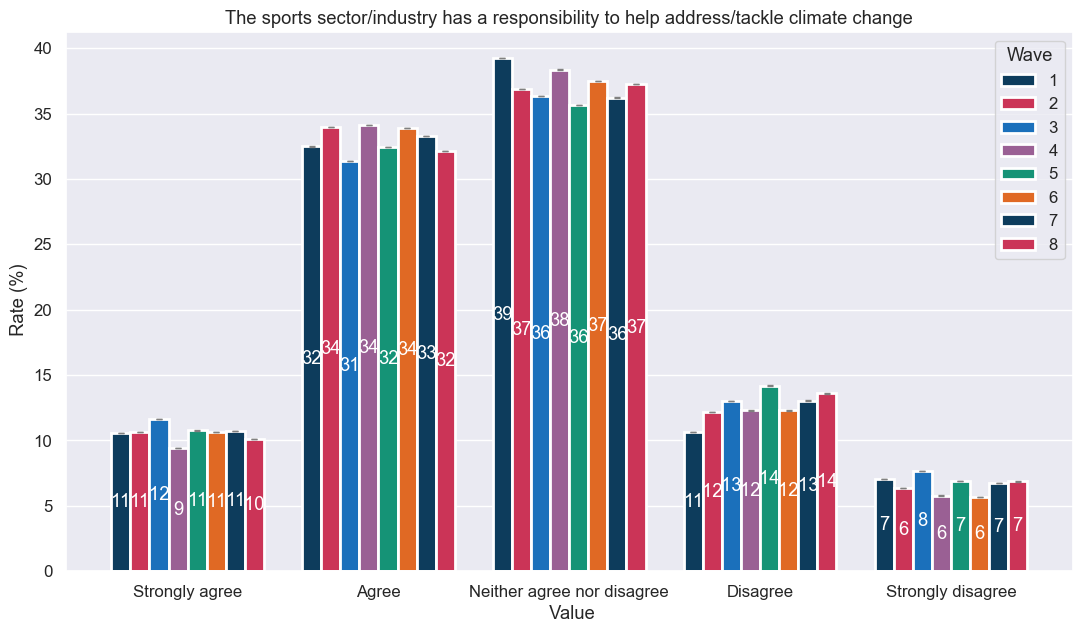

In [15]:
Q10_climate = All[(All[' Question_Code']=='Q10_Climate') & (All[' SubGroup'] == 'Adult')].reset_index()

ax = sns.barplot(x=' Value', 
             y=' Rate (%)', hue='Wave', linewidth=2,
            data=Q10_climate, palette=colours)
plt.title('The sports sector/industry has a responsibility to help address/tackle climate change')
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='center', color='w')
ax.bar_label(ax.containers[1], fmt='%.0f', label_type='center', color='w')
ax.bar_label(ax.containers[2], fmt='%.0f', label_type='center', color='w')
ax.bar_label(ax.containers[3], fmt='%.0f', label_type='center', color='w')
ax.bar_label(ax.containers[4], fmt='%.0f', label_type='center', color='w')
ax.bar_label(ax.containers[5], fmt='%.0f', label_type='center', color='w')
ax.bar_label(ax.containers[6], fmt='%.0f', label_type='center', color='w')
ax.bar_label(ax.containers[7], fmt='%.0f', label_type='center', color='w')
x_coords = [p.get_x() + 0.5*p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, yerr=Q10_climate[" Rate_CI"], fmt="none", c= "grey", capsize=2)

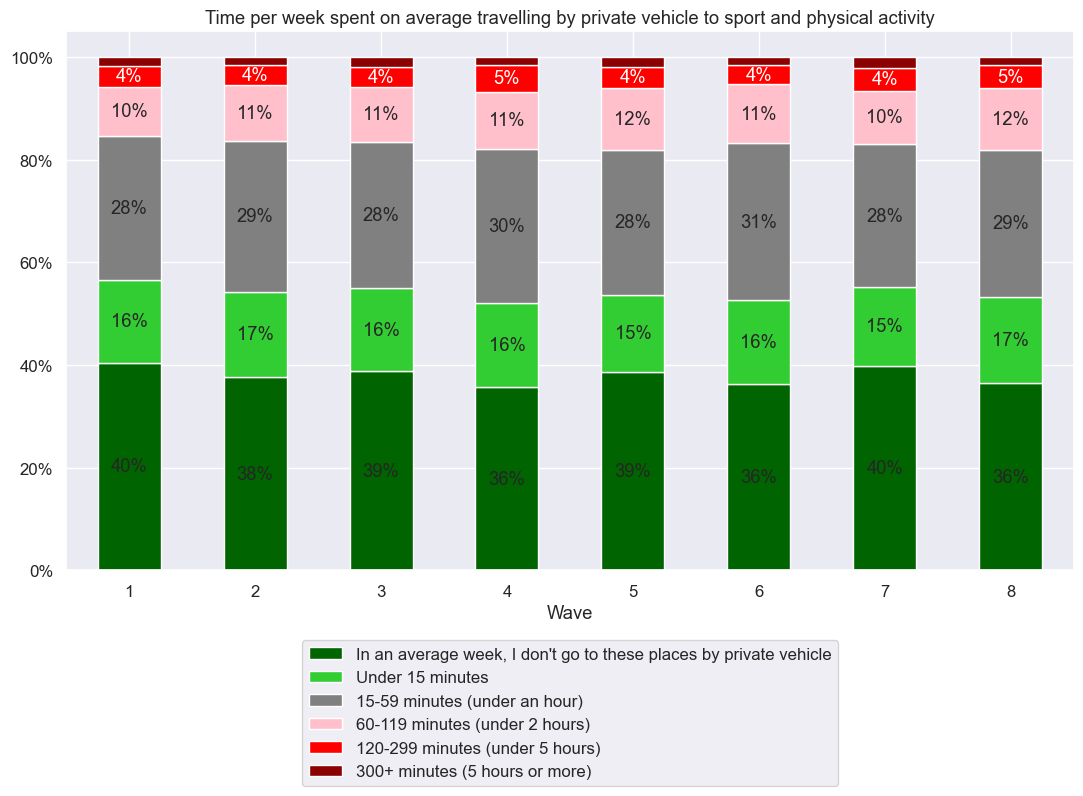

In [16]:
Q14_PrivateTravelTime = All[(All[' Question_Code']=='Q14_PrivateTravelTime') & (All[' SubGroup'] == 'Adult')].reset_index()

Q14_PrivateTravelTime2 = Q14_PrivateTravelTime.groupby(['Wave', ' Value'])[' Rate'].sum().unstack().fillna(0)

Q14_PrivateTravelTime3 = Q14_PrivateTravelTime2[["In an average week, I don't go to these places by private vehicle", 'Under 15 minutes', '15-59 minutes (under an hour)',\
                        '60-119 minutes (under 2 hours)', '120-299 minutes (under 5 hours)',\
                        '300+ minutes (5 hours or more)']]

colors = ["darkgreen","limegreen","gray","pink","red","darkred"]

sns.color_palette("inferno")
ax = Q14_PrivateTravelTime3.plot(kind='bar', stacked=True, color=colors)
plt.title('Time per week spent on average travelling by private vehicle to sport and physical activity')
plt.xticks(rotation=0, ha='center')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.bar_label(ax.containers[0], fmt='{:.0%}', label_type='center')
ax.bar_label(ax.containers[1], fmt='{:.0%}', label_type='center')
ax.bar_label(ax.containers[2], fmt='{:.0%}', label_type='center')
ax.bar_label(ax.containers[3], fmt='{:.0%}', label_type='center')
ax.bar_label(ax.containers[4], fmt='{:.0%}', label_type='center', color='w')
plt.legend(bbox_to_anchor=(0.5, -0.4), loc='lower center', borderaxespad=0)

In [17]:
# Set the figure size.
sns.set(rc={'figure.figsize':(17, 9)})

# Set the tick style.
sns.set_style('ticks')

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
# Set the figure size.
sns.set(rc={'figure.figsize':(12, 7)})

# Set the tick style.
sns.set_style('ticks')
sns.set(font_scale=1.1)

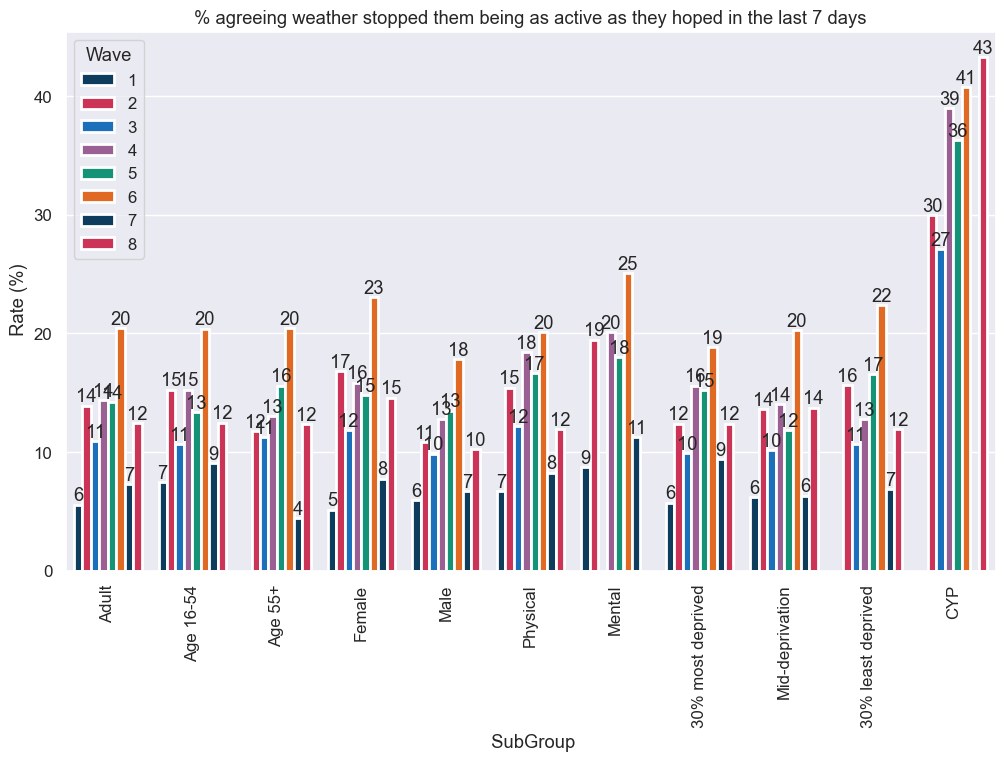

In [20]:
Q7_Weather = All[All[' Question_Code'].str.contains("Q7_Stopped_Weather") &\
                 ((All[' SubGroup'] == 'Adult')|\
                 (All[' SubGroup'] == 'Age 16-54')|\
                 (All[' SubGroup'] == 'Age 55+')|\
                 (All[' SubGroup'] == 'Female')|\
                 (All[' SubGroup'] == 'Male')|\
                 (All[' SubGroup'] == '30% most deprived')|\
                 (All[' SubGroup'] == 'Mid-deprivation')|\
                (All[' SubGroup'] == '30% least deprived')|\
                  (All[' SubGroup'] == 'Physical')|\
                  (All[' SubGroup'] == 'Mental')|\
                  (All[' SubGroup'] == 'CYP')\
                 )].reset_index()

ax = sns.barplot(x=' SubGroup', 
             y=' Rate (%)', hue='Wave', linewidth=2,
            data=Q7_Weather, palette=colours)
plt.title('% agreeing weather stopped them being as active as they hoped in the last 7 days')
ax.bar_label(ax.containers[0], fmt='%.0f')
ax.bar_label(ax.containers[1], fmt='%.0f')
ax.bar_label(ax.containers[2], fmt='%.0f')
ax.bar_label(ax.containers[3], fmt='%.0f')
ax.bar_label(ax.containers[4], fmt='%.0f')
ax.bar_label(ax.containers[5], fmt='%.0f')
ax.bar_label(ax.containers[6], fmt='%.0f')
ax.bar_label(ax.containers[7], fmt='%.0f')
ax.tick_params(axis='x', rotation=90)

In [21]:
# Set the figure size.
sns.set(rc={'figure.figsize':(10, 12)})

# Set the tick style.
sns.set_style('ticks')

In [22]:
Q8 = All[(All[' Question_Label'].str.contains("Q8. Thinkin") & (All[' Question_Code'].str.contains("GR2") == False)\
                   & ((All[' SubGroup'] == 'Male')|(All[' SubGroup'] == 'Female')) & (All['Wave'] == 6)\
          & (All[' Value'] == 'Strongly agree'))].reset_index()

Q8 = Q8.sort_values(by=' Rate', ascending=False)

# re-label Q8 questions
Q8['Q8'] = Q8[' Question_Code'].map({'Q8_Enjoyment':'I find exercise enjoyable and satisfying',
                                    'Q8_Importance':'It is important to me to exercise regularly',
                                    'Q8_Guilt':'I feel guilty when I don’t exercise',
                                    'Q8_Disappoint':'I exercise because I don’t want to disappoint other people',
                                    'Q8_FitHealthy':'I exercise to stay fit and healthy',
                                    'Q8_Relax':'I exercise to help me relax and worry less about things',
                                    'Q8_Challenge':'I exercise to challenge myself (either against myself or others)',
                                    'Q8_WhoIAm':'Being physically active is an important part of who I am as a person',
                                    'Q8_OppSocial':'Sport and physical activity provides an opportunity to be social',
                                    'Q8_Appearance':'I exercise to change my physical appearance'})

In [23]:
sns.set(font_scale=2)

Text(0.5, 1.0, '% strongly agree with each statement - wave 6')

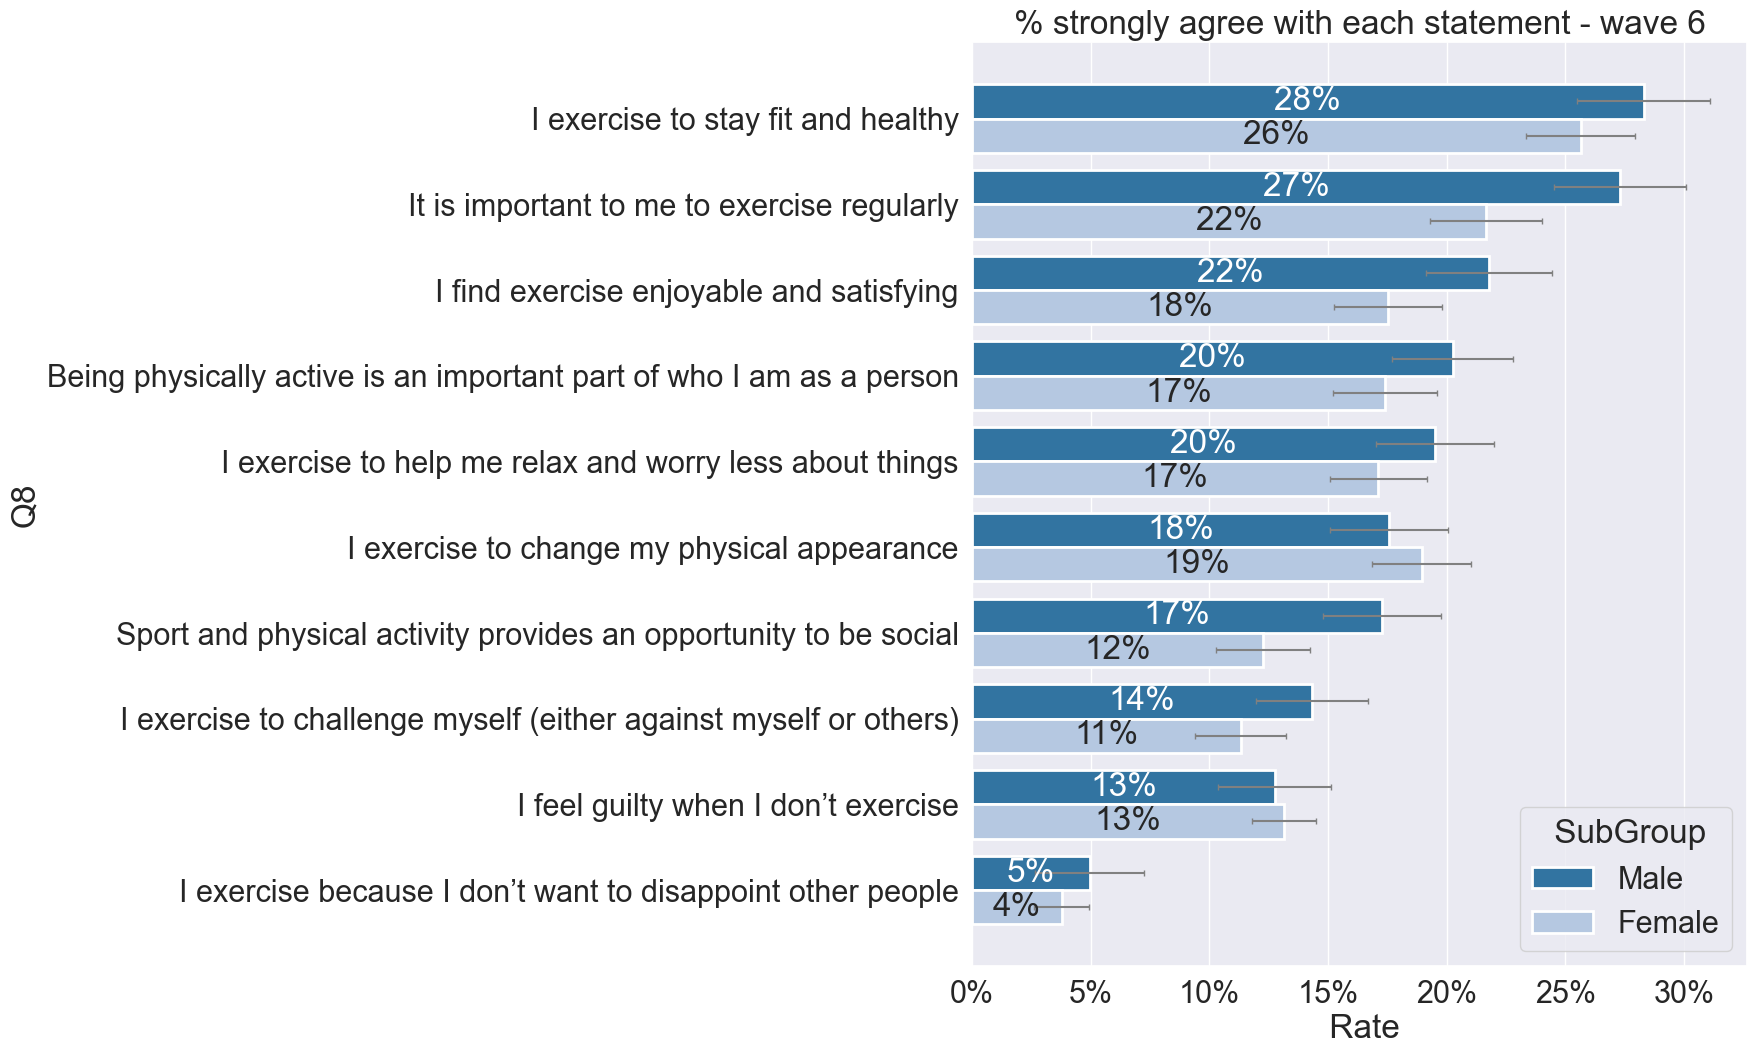

In [24]:
ax = sns.barplot(y='Q8', 
             x=' Rate', hue=' SubGroup', linewidth=2, ci=None,
            data=Q8, palette='tab20')
ax.bar_label(ax.containers[0], fmt='{:.0%}', label_type='center', color='w')
ax.bar_label(ax.containers[1], fmt='{:.0%}', label_type='center')
y_coords = [p.get_y() + 0.5*p.get_height() for p in ax.patches]
x_coords = [p.get_width() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, xerr=Q8[" Rate_CI"], fmt="none", c= "grey", capsize=2)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
plt.title('% strongly agree with each statement - wave 6')

Text(0.5, 1.0, '% strongly agree with each statement - wave 6')

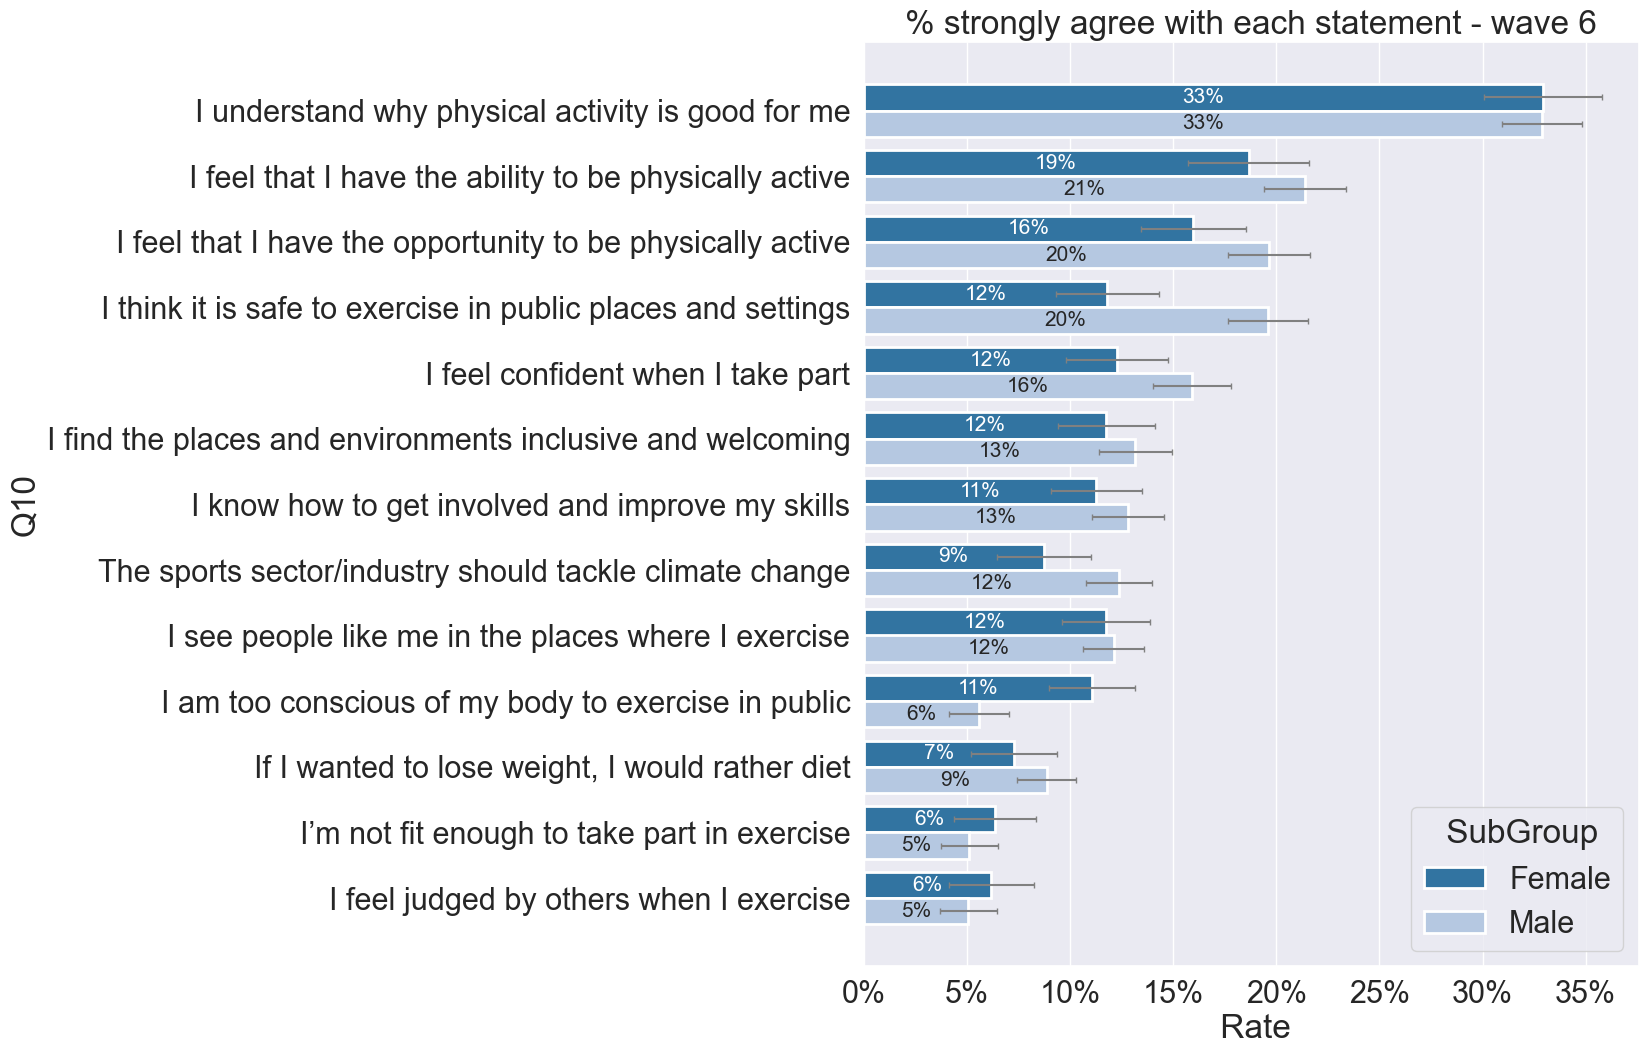

In [25]:
Q10 = All[(All[' Question_Label'].str.contains("Q10.") & (All[' Question_Code'].str.contains("GR2") == False)\
                   & ((All[' SubGroup'] == 'Male')|(All[' SubGroup'] == 'Female')) & (All['Wave'] == 6)\
          & (All[' Value'] == 'Strongly agree'))].reset_index()

Q10 = Q10.sort_values(by=' Rate', ascending=False)

# Split the data set into ID1 as treatment and ID2 & ID3 as control groups.
Q10['Q10'] = Q10[' Question_Code'].map({
'Q10_Capability': 'I feel that I have the ability to be physically active',
'Q10_Opportunity': 'I feel that I have the opportunity to be physically active',
'Q10_NotFit':'I’m not fit enough to take part in exercise',
'Q10_Judged': 'I feel judged by others when I exercise',
'Q10_Inclusive': 'I find the places and environments inclusive and welcoming',
'Q10_PeopleLikeMe': 'I see people like me in the places where I exercise',
'Q10_Safe': 'I think it is safe to exercise in public places and settings',
'Q10_Climate': 'The sports sector/industry should tackle climate change',
'Q10_Confidence': 'I feel confident when I take part',
'Q10_Understanding': 'I understand why physical activity is good for me',
'Q10_Knowledge': 'I know how to get involved and improve my skills',
'Q10_LoseWeight': 'If I wanted to lose weight, I would rather diet',
'Q10_BodyConscious': 'I am too conscious of my body to exercise in public'
})

ax = sns.barplot(y='Q10', 
             x=' Rate', hue=' SubGroup', linewidth=2, ci=None,
            data=Q10, palette='tab20')
ax.bar_label(ax.containers[0], fmt='{:.0%}', label_type='center', color='w', fontsize=15)
ax.bar_label(ax.containers[1], fmt='{:.0%}', label_type='center', fontsize=15)
y_coords = [p.get_y() + 0.5*p.get_height() for p in ax.patches]
x_coords = [p.get_width() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, xerr=Q10[" Rate_CI"], fmt="none", c= "grey", capsize=2)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
plt.title('% strongly agree with each statement - wave 6')

In [26]:
# Set the figure size.
sns.set(rc={'figure.figsize':(14, 6)})

# Set the tick style.
sns.set_style('ticks')

In [27]:
# re-label wave
All['Wave '] = All['Wave'].map({1:'1: Mar 2022',
                                2:'2: Jul 2022',
                                3:'3: Aug 2022',
                                4:'4: Nov 2022',
                                5:'5: Feb 2023',
                                6:'6: Apr 2023',
                                7: '7: Jun 2023',  8: '8: Aug 2023'})

In [28]:
Q99W01a_LivingCostImpact = All[(All[' Question_Code']=='Q99W01a_LivingCostImpact')\
                            & (All[' SubGroup'] == 'Adult')].reset_index()

Q99W01a_LivingCostImpact = Q99W01a_LivingCostImpact.groupby(['Wave ', ' Value'])[' Rate'].sum().unstack().fillna(0)

Q99W01a_LivingCostImpact = Q99W01a_LivingCostImpact[['Significant positive impact', 'Some positive impact',\
                            'Little or no impact', 'Some negative impact', 'Significant negative impact']]

colors = ["darkgreen","limegreen","gray","pink","red","darkred"]

In [29]:
# Sorting waves in descending order
Q99W01a_LivingCostImpact = Q99W01a_LivingCostImpact.assign(row_number=range(len(Q99W01a_LivingCostImpact)))
Q99W01a_LivingCostImpact2 = Q99W01a_LivingCostImpact.sort_values(by="row_number", ascending=False)
Q99W01a_LivingCostImpact2 = Q99W01a_LivingCostImpact2[['Significant positive impact', 'Some positive impact',\
                            'Little or no impact', 'Some negative impact', 'Significant negative impact']]

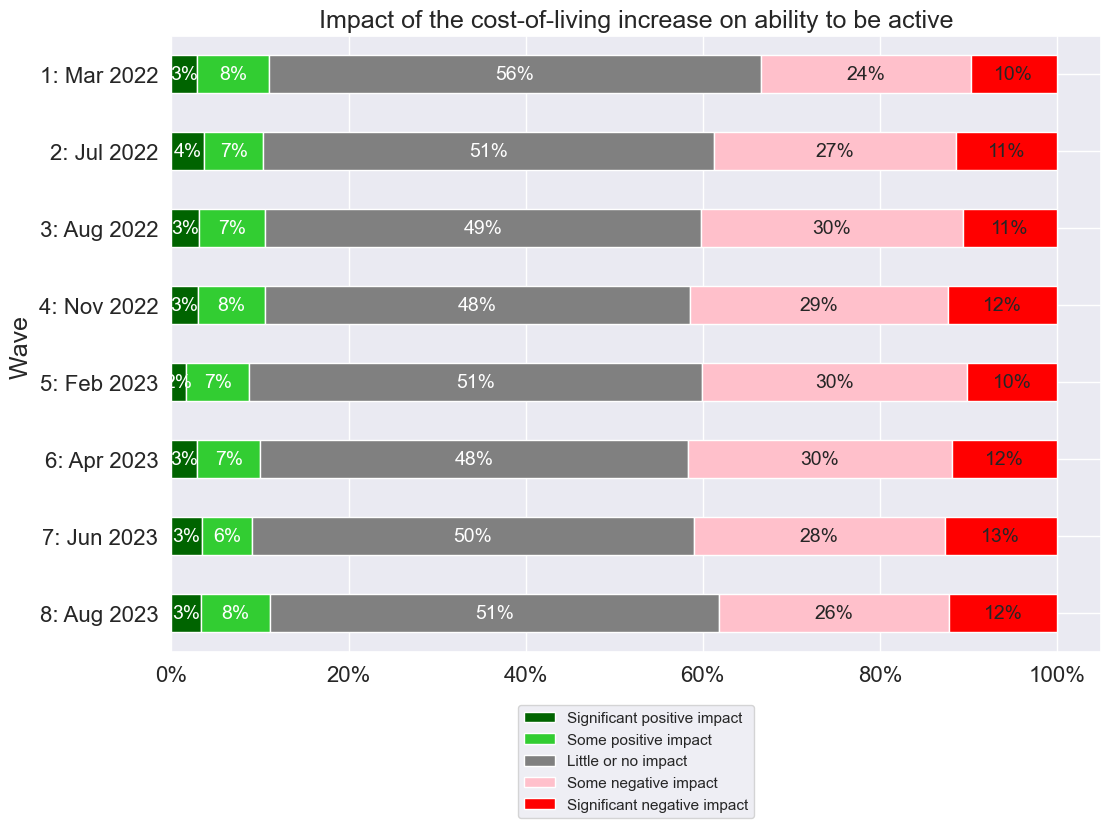

In [30]:
# Set the figure size.
sns.set(rc={'figure.figsize':(12, 8)})

colors = ["darkgreen","limegreen","gray","pink","red","darkred"]
ax = Q99W01a_LivingCostImpact2.plot(kind='barh', stacked=True, color=colors)
plt.title('Impact of the cost-of-living increase on ability to be active')
plt.xticks(rotation=0, ha='center')
ax.bar_label(ax.containers[0], fmt='{:.0%}', label_type='center', color='w', fontsize=14)
ax.bar_label(ax.containers[1], fmt='{:.0%}', label_type='center', color='w', fontsize=14)
ax.bar_label(ax.containers[2], fmt='{:.0%}', label_type='center', color='w', fontsize=14)
ax.bar_label(ax.containers[3], fmt='{:.0%}', label_type='center', fontsize=14)
ax.bar_label(ax.containers[4], fmt='{:.0%}', label_type='center', fontsize=14)
ax.title.set_fontsize(18)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
plt.legend(bbox_to_anchor=(0.5, -0.27), loc='lower center', borderaxespad=0)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

In [31]:
# Exporting negative impact for all subgroups to CSV
Q99W01a_LivingCostImpact_GR3_all = All[(All[' Question_Code']=='Q99W01a_LivingCostImpact_GR3') &\
                                     (All[' Value'] == 'Negative impact')].reset_index()

In [32]:
Q99W01a_LivingCostImpact_GR3 = All[(All[' Question_Code']=='Q99W01a_LivingCostImpact_GR3') &\
                                     (All[' SubGroup'] == 'Adult') & (All[' Value'] == 'Negative impact')].reset_index()

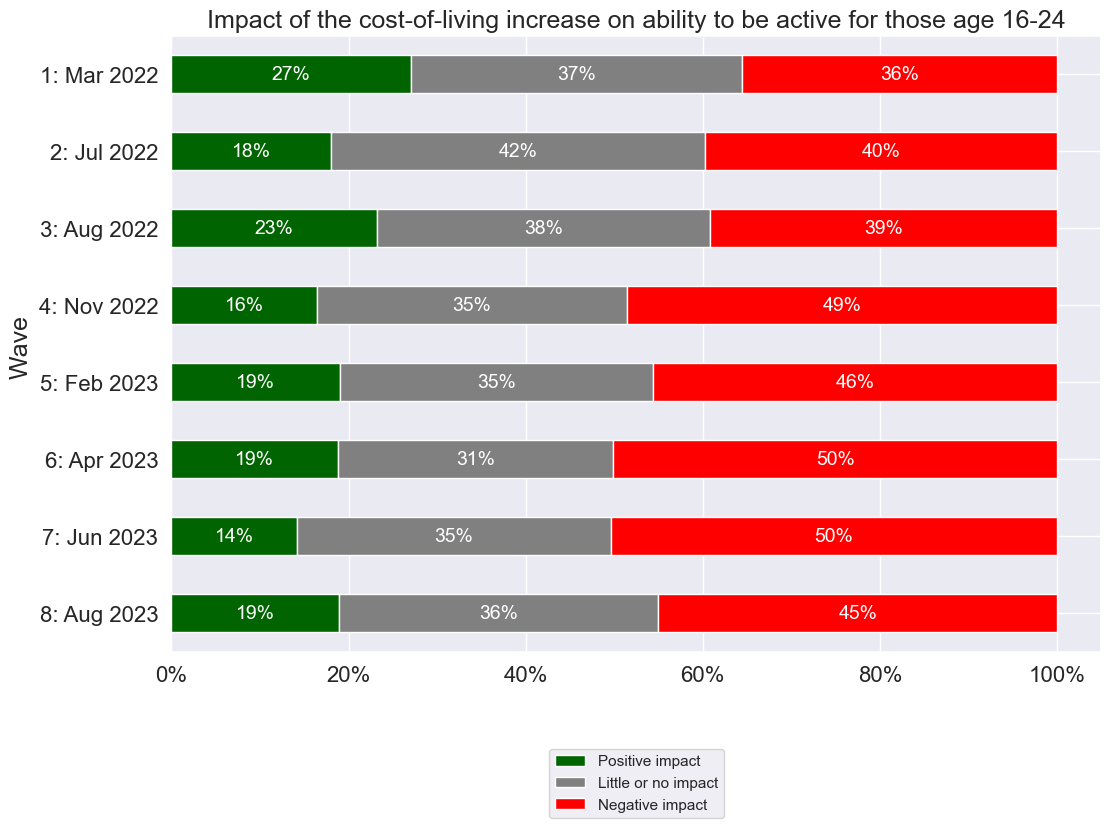

In [33]:
Q99W01a_LivingCostImpact_1624 = All[(All[' Question_Code']=='Q99W01a_LivingCostImpact_GR3') &\
                                     (All[' SubGroup'] == 'Age 16-24')].reset_index()

Q99W01a_LivingCostImpact_1624_2 = Q99W01a_LivingCostImpact_1624.groupby(['Wave ', ' Value'])[' Rate'].\
sum().unstack().fillna(0).sort_index(ascending=False)

Q99W01a_LivingCostImpact_1624_2 = Q99W01a_LivingCostImpact_1624_2[['Positive impact',\
                            'Little or no impact', 'Negative impact']]

colors = ["darkgreen","gray","red"]
ax = Q99W01a_LivingCostImpact_1624_2.plot(kind='barh', stacked=True, color=colors)
plt.title('Impact of the cost-of-living increase on ability to be active for those age 16-24')
plt.xticks(rotation=0, ha='center')
ax.bar_label(ax.containers[0], fmt='{:.0%}', label_type='center', color='w', fontsize=14)
ax.bar_label(ax.containers[1], fmt='{:.0%}', label_type='center', color='w', fontsize=14)
ax.bar_label(ax.containers[2], fmt='{:.0%}', label_type='center', color='w', fontsize=14)
ax.title.set_fontsize(18)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
plt.legend(bbox_to_anchor=(0.5, -0.27), loc='lower center', borderaxespad=0)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

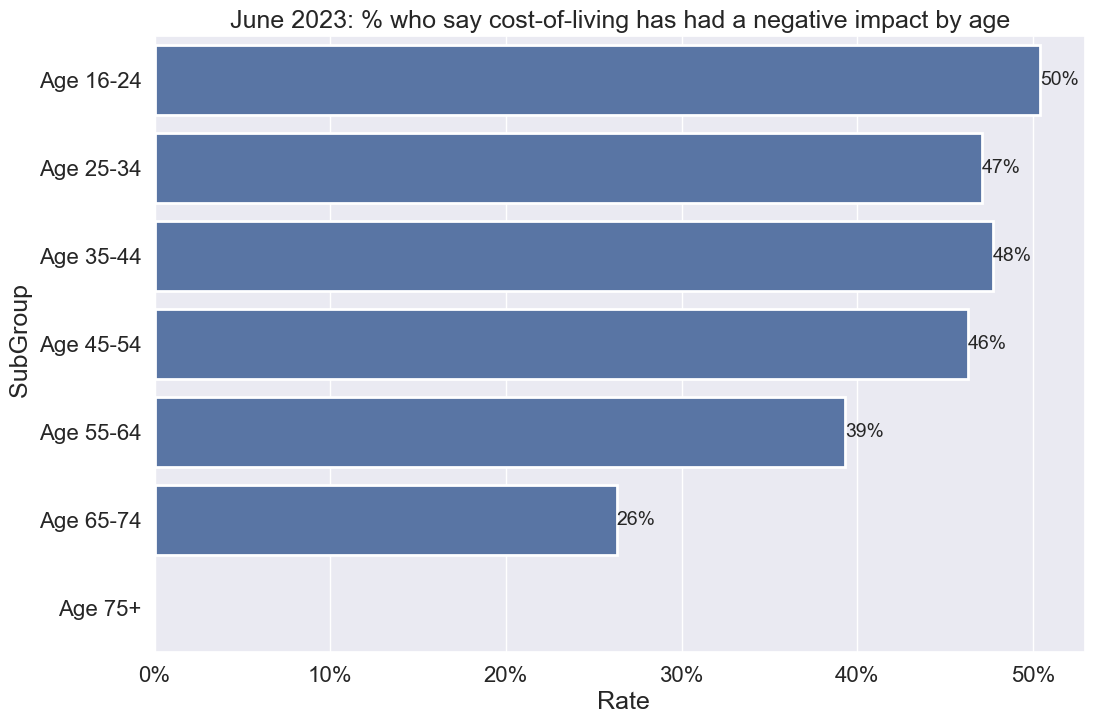

In [34]:
Q99W01a_LivingCostImpact_age = All[(All[' Question_Code']=='Q99W01a_LivingCostImpact_GR3') &
(All[' BreakGroup'] == 'Age - 7 groups') & (All['Wave']==7) & (All[' Value']=='Negative impact')].reset_index()

ax = sns.barplot(y=' SubGroup', 
             x=' Rate', linewidth=2, ci=None, color='b',
            data=Q99W01a_LivingCostImpact_age)
ax.bar_label(ax.containers[0], fmt='{:.0%}', fontsize=14)
plt.title('June 2023: % who say cost-of-living has had a negative impact by age')
ax.title.set_fontsize(18)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

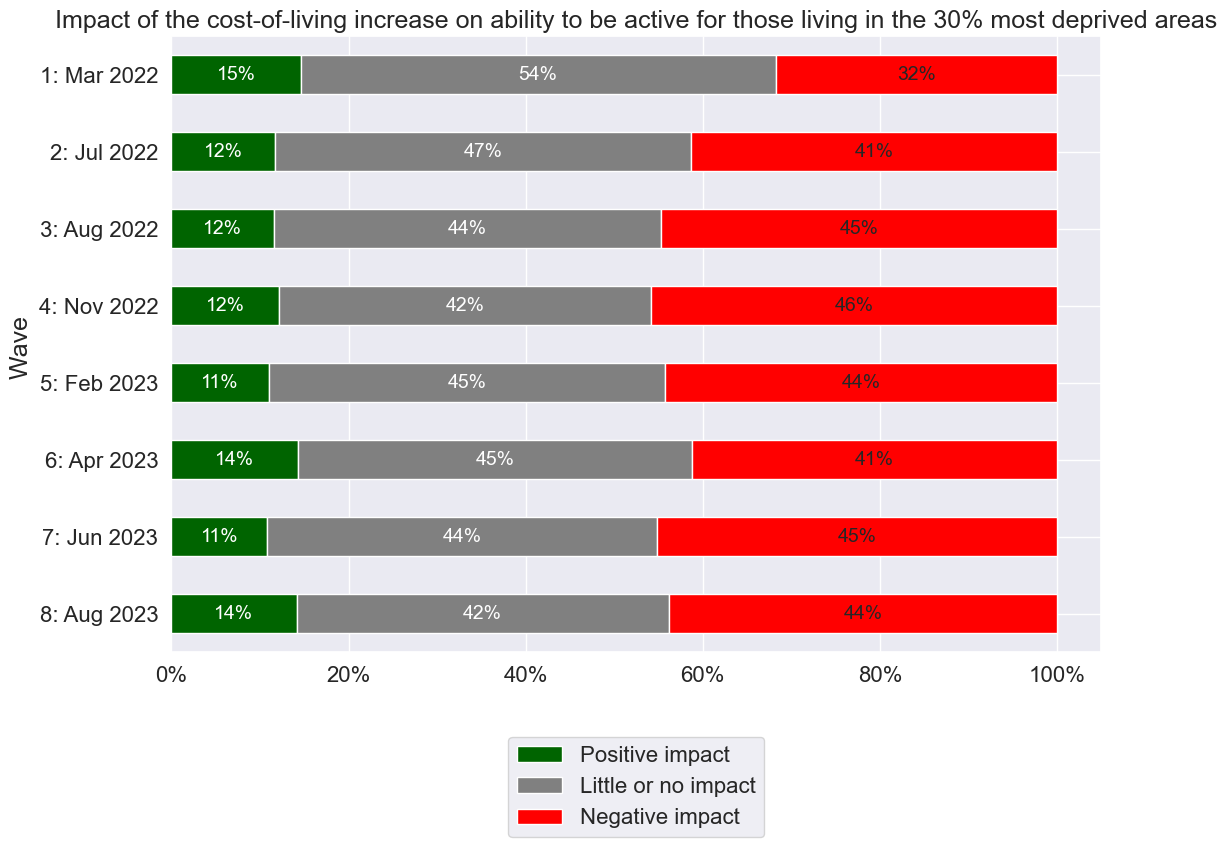

In [35]:
Q99W01a_LivingCostImpact_IMD13 = All[(All[' Question_Code']=='Q99W01a_LivingCostImpact_GR3') &\
                                     (All[' SubGroup'] == '30% most deprived')].reset_index()

Q99W01a_LivingCostImpact_IMD13 = Q99W01a_LivingCostImpact_IMD13.groupby(['Wave ', ' Value'])[' Rate'].\
sum().unstack().fillna(0).sort_index(ascending=False)

Q99W01a_LivingCostImpact_IMD13 = Q99W01a_LivingCostImpact_IMD13[['Positive impact',\
                            'Little or no impact', 'Negative impact']]

colors = ["darkgreen","gray","red"]
ax = Q99W01a_LivingCostImpact_IMD13.plot(kind='barh', stacked=True, color=colors)
plt.title('Impact of the cost-of-living increase on ability to be active for those living in the 30% most deprived areas')
plt.xticks(rotation=0, ha='center')
ax.bar_label(ax.containers[0], fmt='{:.0%}', label_type='center', color='w', fontsize=14)
ax.bar_label(ax.containers[1], fmt='{:.0%}', label_type='center', color='w', fontsize=14)
ax.bar_label(ax.containers[2], fmt='{:.0%}', label_type='center', fontsize=14)
plt.legend(bbox_to_anchor=(0.5, -0.3), loc='lower center', borderaxespad=0, fontsize=16)
ax.title.set_fontsize(18)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

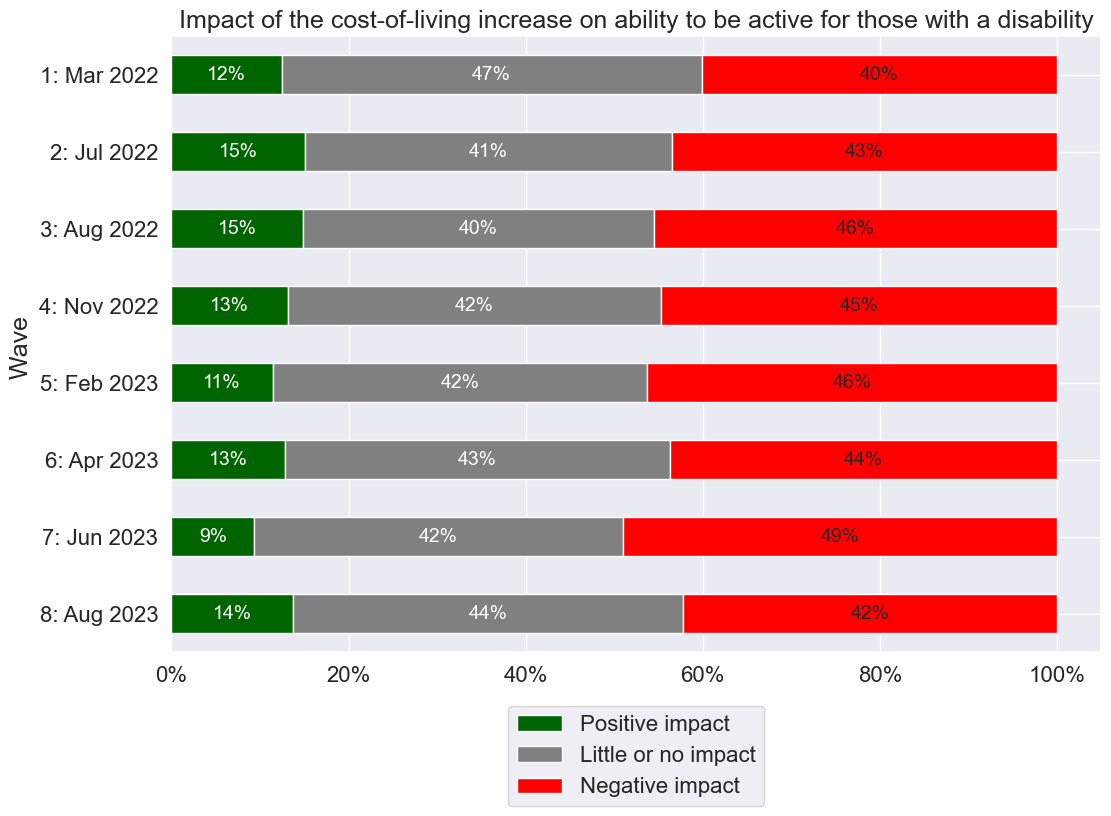

In [36]:
Q99W01a_LivingCostImpact_Disabilities = All[(All[' Question_Code']=='Q99W01a_LivingCostImpact_GR3') &\
                                     (All[' SubGroup'] == 'Yes') & ((All[' BreakGroup'] == 'Disabilities')\
                                            |(All[' BreakGroup'] == 'Disabilities (Adults)'))].reset_index()

Q99W01a_LivingCostImpact_Disabilities = Q99W01a_LivingCostImpact_Disabilities.groupby(['Wave ', ' Value'])[' Rate'].\
sum().unstack().fillna(0).sort_index(ascending=False)

Q99W01a_LivingCostImpact_Disabilities = Q99W01a_LivingCostImpact_Disabilities[['Positive impact',\
                            'Little or no impact', 'Negative impact']]

colors = ["darkgreen","gray","red"]
ax = Q99W01a_LivingCostImpact_Disabilities.plot(kind='barh', stacked=True, color=colors)
plt.title('Impact of the cost-of-living increase on ability to be active for those with a disability')
plt.xticks(rotation=0, ha='center')
ax.bar_label(ax.containers[0], fmt='{:.0%}', label_type='center', color='w', fontsize=14)
ax.bar_label(ax.containers[1], fmt='{:.0%}', label_type='center', color='w', fontsize=14)
ax.bar_label(ax.containers[2], fmt='{:.0%}', label_type='center', fontsize=14)
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', borderaxespad=0, fontsize=16)
ax.title.set_fontsize(18)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

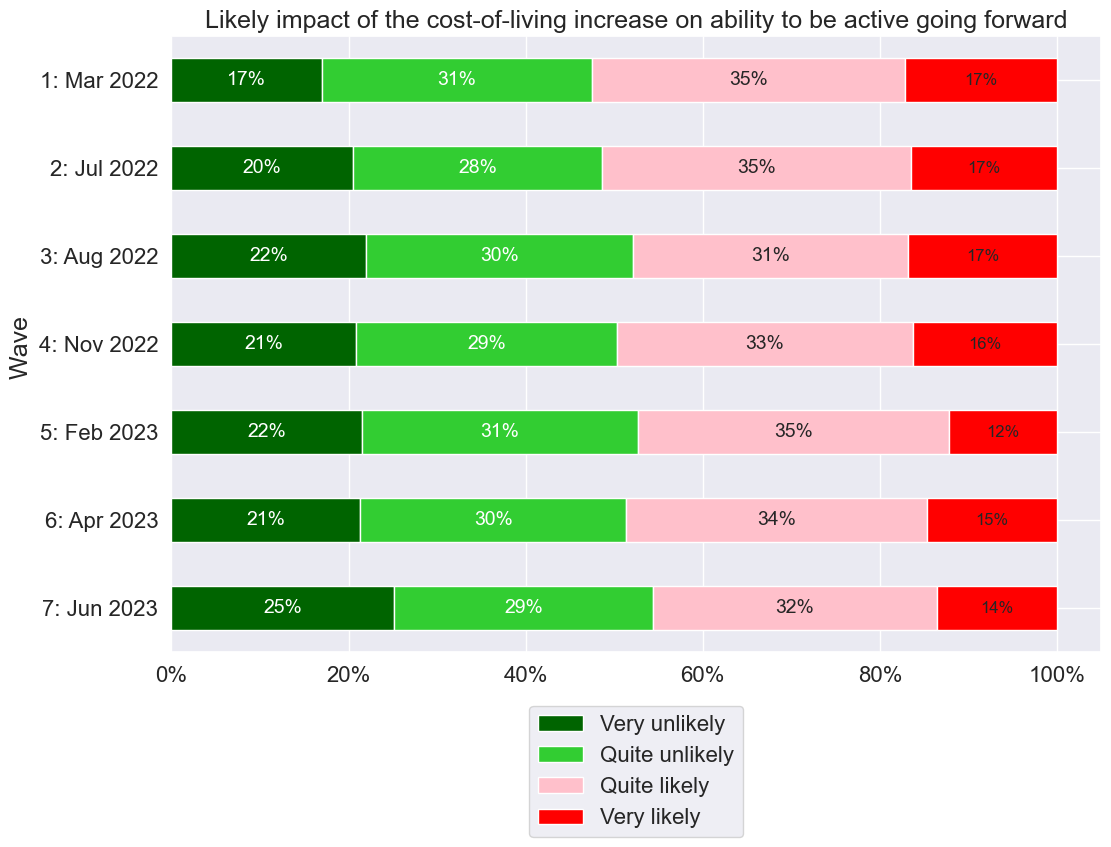

In [37]:
Q99W01b_LivingCostFuture =  All[(All[' Question_Code']=='Q99W01b_LivingCostFuture')\
                            & (All[' SubGroup'] == 'Adult')].reset_index()

Q99W01b_LivingCostFuture = Q99W01b_LivingCostFuture.groupby(['Wave ', ' Value'])[' Rate'].sum().unstack().fillna(0).\
sort_index(ascending=False)

Q99W01b_LivingCostFuture = Q99W01b_LivingCostFuture[['Very unlikely', 'Quite unlikely', 'Quite likely', 'Very likely']]

colors = ["darkgreen","limegreen","pink","red"]
ax = Q99W01b_LivingCostFuture.plot(kind='barh', stacked=True, color=colors)
plt.title('Likely impact of the cost-of-living increase on ability to be active going forward')
plt.xticks(rotation=0, ha='center')
ax.bar_label(ax.containers[0], fmt='{:.0%}', label_type='center', color='w', fontsize=14)
ax.bar_label(ax.containers[1], fmt='{:.0%}', label_type='center', color='w', fontsize=14)
ax.bar_label(ax.containers[2], fmt='{:.0%}', label_type='center', fontsize=14)
ax.bar_label(ax.containers[3], fmt='{:.0%}', label_type='center')
plt.legend(bbox_to_anchor=(0.5, -0.3), loc='lower center', borderaxespad=0, fontsize=16)
ax.title.set_fontsize(18)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

In [38]:
Q99W01b_LivingCostFuture222 =  All[((All[' Question_Code']=='Q99W01b_LivingCostFuture')|\
                                 (All[' Question_Code']=='Q99W01b_LivingCostFuture_GR2'))\
                           ].reset_index()

In [39]:
Q99W01b_LivingCostFuture_VL = All[(All[' Question_Code']=='Q99W01b_LivingCostFuture')\
                            & (All[' Value'] == 'Very likely')].reset_index()
Q99W01b_LivingCostFuture_VL.head()

,index,Wave,Scope,Question_Code,Question_Label,BaseValue,Value,BreakType,BreakGroup,SubGroup,...,Rate_CI,Rate_LowerCI,Rate_UpperCI,Mean,Mean_Variance,Mean_CI,Mean_LowerCI,Mean_UpperCI,Rate (%),Wave
0,257,1,Adult,Q99W01b_LivingCostFuture,"QW1Q. Going forward, how likely or unlikely do...",All adults,Very likely,Demographic,All adults,Adult,...,0.0172,0.1544,0.1888,NaN,NaN,NaN,NaN,NaN,17.16,1: Mar 2022
1,521,1,Adult,Q99W01b_LivingCostFuture,"QW1Q. Going forward, how likely or unlikely do...",All adults,Very likely,Demographic,Age - 7 groups (Adults),Age 16-24,...,0.0479,0.1226,0.2184,NaN,NaN,NaN,NaN,NaN,17.05,1: Mar 2022
2,785,1,Adult,Q99W01b_LivingCostFuture,"QW1Q. Going forward, how likely or unlikely do...",All adults,Very likely,Demographic,Age - 7 groups (Adults),Age 25-34,...,0.0447,0.1748,0.2642,NaN,NaN,NaN,NaN,NaN,21.95,1: Mar 2022
3,1049,1,Adult,Q99W01b_LivingCostFuture,"QW1Q. Going forward, how likely or unlikely do...",All adults,Very likely,Demographic,Age - 7 groups (Adults),Age 35-44,...,0.0455,0.1408,0.2318,NaN,NaN,NaN,NaN,NaN,18.63,1: Mar 2022
4,1313,1,Adult,Q99W01b_LivingCostFuture,"QW1Q. Going forward, how likely or unlikely do...",All adults,Very likely,Demographic,Age - 7 groups (Adults),Age 45-54,...,0.0484,0.1673,0.2641,NaN,NaN,NaN,NaN,NaN,21.57,1: Mar 2022


In [40]:
Q99W01b_LivingCostFuture_GR2 = All[(All[' Question_Code']=='Q99W01b_LivingCostFuture_GR2')\
                            & (All[' SubGroup'] == 'Adult') & (All[' Value'] == 'Likely')].reset_index()
Q99W01b_LivingCostFuture_GR2

,index,Wave,Scope,Question_Code,Question_Label,BaseValue,Value,BreakType,BreakGroup,SubGroup,...,Rate_CI,Rate_LowerCI,Rate_UpperCI,Mean,Mean_Variance,Mean_CI,Mean_LowerCI,Mean_UpperCI,Rate (%),Wave
0,261,1,Adult,Q99W01b_LivingCostFuture_GR2,"QW1Q. Going forward, how likely or unlikely do...",All adults,Likely,Demographic,All adults,Adult,...,0.0227,0.5024,0.5478,NaN,NaN,NaN,NaN,NaN,52.51,1: Mar 2022
1,261,2,Adult,Q99W01b_LivingCostFuture_GR2,"QW1Q. Going forward, how likely or unlikely do...",All adults,Likely,Demographic,All adults,Adult,...,0.0207,0.4925,0.5339,NaN,NaN,NaN,NaN,NaN,51.32,2: Jul 2022
2,261,3,Adult,Q99W01b_LivingCostFuture_GR2,"QW1Q. Going forward, how likely or unlikely do...",All adults,Likely,Demographic,All adults,Adult,...,0.0227,0.4556,0.5010,NaN,NaN,NaN,NaN,NaN,47.83,3: Aug 2022
3,346,4,Adult,Q99W01b_LivingCostFuture_GR2,"QW1Q. Going forward, how likely or unlikely do...",All adults,Likely,Demographic,All adults,Adult,...,0.0221,0.4748,0.5190,NaN,NaN,NaN,NaN,NaN,49.69,4: Nov 2022
4,340,5,Adult,Q99W01b_LivingCostFuture_GR2,"QW1Q. Going forward, how likely or unlikely do...",All adults,Likely,Demographic,All adults,Adult,...,0.0226,0.4505,0.4957,NaN,NaN,NaN,NaN,NaN,47.31,5: Feb 2023
5,344,6,Adult,Q99W01b_LivingCostFuture_GR2,"QW1Q. Going forward, how likely or unlikely do...",All adults,Likely,Demographic,All adults,Adult,...,0.0226,0.4639,0.5091,NaN,NaN,NaN,NaN,NaN,48.65,6: Apr 2023
6,344,7,Adult,Q99W01b_LivingCostFuture_GR2,"QW1Q. Going forward, how likely or unlikely do...",All adults,Likely,Demographic,All adults,Adult,...,0.0222,0.4340,0.4784,NaN,NaN,NaN,NaN,NaN,45.62,7: Jun 2023


In [41]:
# Set the figure size.
sns.set(rc={'figure.figsize':(7, 7)})

# Set the tick style.
sns.set_style('ticks')

In [ ]:
Q99W01b_LivingCostFuture_GR2_W6 = All[(All[' Question_Code']=='Q99W01b_LivingCostFuture_GR2')\
                           & (All[' Value'] == 'Likely') & ((All['Wave'] == 6)|(All['Wave'] == 7)) &\
                    ((All[' BreakGroup'] == 'All adults')|(All[' BreakGroup'].str.contains("Age - 4 groups"))|\
                        (All[' BreakGroup'].str.contains("Gender") & (All[' SubGroup'].str.contains("another way")==False)\
                                                                      ))].reset_index()

ax = sns.barplot(y=' SubGroup', 
             x=' Rate', hue='Wave', linewidth=2, palette=colours,
            data=Q99W01b_LivingCostFuture_GR2_W6)
ax.bar_label(ax.containers[0], fmt='{:.0%}', color='w', padding=-40)
ax.bar_label(ax.containers[1], fmt='{:.0%}', color='w', padding=-40)
plt.title('% who say cost-of-living will likely have a negative impact in future')
ax.title.set_fontsize(18)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
y_coords = [p.get_y() + 0.5*p.get_height() for p in ax.patches]
x_coords = [p.get_width() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, xerr=Q99W01b_LivingCostFuture_GR2_W6[" Rate_CI"], fmt="none", c= "grey", capsize=2)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

In [ ]:
# Set the figure size.
sns.set(rc={'figure.figsize':(10, 7)})

In [ ]:
Q99W01a_LivingCostImpact_Eth = All[(All[' Question_Code']=='Q99W01a_LivingCostImpact_GR3')\
                                    & (All[' Value'].str.contains("Negative"))\
                                   & ((All[' SubGroup'].str.contains("Asian"))|\
                                     (All[' SubGroup'].str.contains("Adult"))|\
                                     (All[' SubGroup'].str.contains("Black")))].reset_index()
                                    
ax = sns.barplot(y=' Rate', 
             x=' SubGroup', hue='Wave ', linewidth=2, ci=None,
            data=Q99W01a_LivingCostImpact_Eth, palette=colours)
ax.bar_label(ax.containers[0], fmt='{:.0%}', label_type='center', color='w', fontsize=9)
ax.bar_label(ax.containers[1], fmt='{:.0%}', label_type='center', color='w', fontsize=9)
ax.bar_label(ax.containers[2], fmt='{:.0%}', label_type='center', color='w', fontsize=9)
ax.bar_label(ax.containers[3], fmt='{:.0%}', label_type='center', color='w', fontsize=9)
ax.bar_label(ax.containers[4], fmt='{:.0%}', label_type='center', color='w', fontsize=9)
ax.bar_label(ax.containers[5], fmt='{:.0%}', label_type='center', color='w', fontsize=9)
ax.bar_label(ax.containers[6], fmt='{:.0%}', label_type='center', color='w', fontsize=9)
ax.bar_label(ax.containers[7], fmt='{:.0%}', label_type='center', color='w', fontsize=9)
x_coords = [p.get_x() + 0.5*p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
ax.errorbar(x=x_coords, y=y_coords, yerr=Q99W01a_LivingCostImpact_Eth[" Rate_CI"], fmt="none", c= "grey", capsize=2)
plt.title('% who say cost-of-living has had a negative impact on activity, by ethnicity')
plt.legend(bbox_to_anchor=(0.5, -0.6), loc='lower center', borderaxespad=0, fontsize=16)
ax.title.set_fontsize(18)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

In [ ]:
# Set the figure size.
sns.set(rc={'figure.figsize':(12, 8)})

Q99W01a_LivingCostImpact_Age = All[(All[' Question_Code']=='Q99W01a_LivingCostImpact_GR3')\
                                    & (All[' Value'].str.contains("Negative"))\
                                   & (All[' BreakGroup'].str.contains("Age - 7 groups"))].reset_index()
                                    
ax = sns.barplot(y=' Rate', 
             x=' SubGroup', hue='Wave ', linewidth=2,
            data=Q99W01a_LivingCostImpact_Age, palette=colours)
ax.bar_label(ax.containers[1], fmt='{:.0%}', fontsize=9)
ax.bar_label(ax.containers[3], fmt='{:.0%}', fontsize=9)
ax.bar_label(ax.containers[5], fmt='{:.0%}', fontsize=9)
ax.bar_label(ax.containers[7], fmt='{:.0%}', fontsize=9)
plt.title('% who say cost-of-living has had a negative impact on activity, by age')
plt.legend(bbox_to_anchor=(0.5, -0.4), loc='lower center', borderaxespad=0)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

In [ ]:
QW3P = All[(All[' Question_Label'].str.contains("QW3P.") & (All[' Value'].str.contains("Yes"))\
                   & ((All[' SubGroup'] == 'Adult'))\
         )].reset_index()

QW3P = QW3P.sort_values(by=' Rate', ascending=False)
QW3P.head()

In [ ]:
Q7 = All[((All[' Question_Code'].str.contains("Q7.")) & (All[' Question_Code'].str.contains("Nothing")==False)\
          & (All[' Question_Code'].str.contains("Other")==False) & (All[' Question_Code'].str.contains("Info")==False))\
                   & ((All[' SubGroup'] == 'Adult')\
                  & ((All['Wave'] == 5)|(All['Wave'] == 6)|(All['Wave'] == 7)|(All['Wave'] == 8)))\
         ].reset_index()

Q7 = Q7.sort_values(['Wave', ' Rate'], ascending=[True, False])
Q7.head()

# Split the data set into ID1 as treatment and ID2 & ID3 as control groups.
Q7['Q7'] = Q7[' Question_Code'].map({
'Q7_Stopped_Illness': 'I’ve been unwell/injured',
'Q7_Stopped_Pregnancy': 'I am pregnant, or have a new-born',
'Q7_Stopped_Disability': 'My disability or long term-health condition',
'Q7_Stopped_Family' : 'I couldn’t fit it in around family commitments',
'Q7_Stopped_Work' : 'I couldn’t fit it in around work/study',
'Q7_Stopped_Motivation' : 'I lacked motivation or interest in being active',
'Q7_Stopped_Fitness' : 'I did not feel fit enough',
'Q7_Stopped_People' : 'I didn’t have anyone to take part with',
'Q7_Stopped_Facilities' : 'I didn’t have access to/could not get to the facilities',
'Q7_Stopped_Places' : 'I didn’t have a local space available to do the activity(s)',
'Q7_Stopped_Sessions' : 'There was nowhere or no one running the activity(s)',
'Q7_Stopped_Finances' : 'I couldn’t afford the things I needed',
'Q7_Stopped_Away' : 'I was away from home (for instance on holiday)',
'Q7_Stopped_Weather' : 'The weather wasn’t suitable for being active',
'Q7_Stopped_Attention' : 'I was worried about unwanted attention',
'Q7_Stopped_Safetly' : 'I was worried about my personal safety',
'Q7_Stopped_Covid' : 'I was worried about catching or spreading Covid-19',
'Q7_Stopped_Body' : 'My body confidence was low'})

In [ ]:
# Set the figure size.
sns.set(rc={'figure.figsize':(8, 20)})

# Set the tick style.
sns.set_style('ticks')

In [ ]:
ax = sns.barplot(y='Q7', 
             x=' Rate', hue='Wave ', linewidth=2, ci=None,
            data=Q7, palette=colours)
ax.bar_label(ax.containers[0], fmt='{:.0%}')
ax.bar_label(ax.containers[1], fmt='{:.0%}')
ax.bar_label(ax.containers[2], fmt='{:.0%}')
ax.bar_label(ax.containers[3], fmt='{:.0%}')
ax.title.set_fontsize(18)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
plt.setp(ax.get_legend().get_texts(), fontsize='16') 
plt.setp(ax.get_legend().get_title(), fontsize='16') 
#y_coords = [p.get_y() + 0.5*p.get_height() for p in ax.patches]
#x_coords = [p.get_width() for p in ax.patches]
#ax.errorbar(x=x_coords, y=y_coords, xerr=Q7[" Rate_CI"], fmt="none", c= "grey", capsize=2)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))

In [ ]:
QW3T = All[(All[' Question_Label'].str.contains("QW3T.")\
                   & ((All[' SubGroup'] == 'Adult')) & ((All[' Value'] == 'Yes'))\
             & (All[' Question_Code'].str.contains("Other") == False) \
            & (All[' Question_Code'].str.contains("None") == False) & (All[' Question_Code'].str.contains("Friends") == False)\
         )].reset_index()

QW3T = QW3T.sort_values(['Wave', ' Rate'], ascending=[True, False])
QW3T.head()

In [ ]:
# Split the data set into ID1 as treatment and ID2 & ID3 as control groups.
QW3T['QW3T'] = QW3T[' Question_Code'].map({'QW3T_LivingCost_Consider_Cost': 'The cost of the activity',
'QW3T_LivingCost_Consider_Distance': 'Distance and mode of travel to the activity',
'QW3T_LivingCost_Consider_Membership': 'The membership options available',
'QW3T_LivingCost_Consider_Flexibility': 'The flexibility of the activity',
'QW3T_LivingCost_Consider_Enjoyment': 'The enjoyment you get from the activity',
'QW3T_LivingCost_Consider_PhysicalBenefits': 'The physical benefits you get',
'QW3T_LivingCost_Consider_MentalBenefits': 'The mental benefits you get',
'QW3T_LivingCost_Consider_Social': 'The opportunities the activity gives you to socialise'})

In [ ]:
# Set the figure size.
sns.set(rc={'figure.figsize':(9, 10)})

# Set the tick style.
sns.set_style('ticks')

In [ ]:
# Set the figure size.
sns.set(rc={'figure.figsize':(9, 13)})

ax = sns.barplot(y='QW3T', 
             x=' Rate', hue='Wave ', linewidth=2,
            data=QW3T, palette=colours)
ax.bar_label(ax.containers[0], fmt='{:.0%}', label_type='center', color='w')
ax.bar_label(ax.containers[1], fmt='{:.0%}', label_type='center', color='w')
ax.bar_label(ax.containers[2], fmt='{:.0%}', label_type='center', color='w')
ax.bar_label(ax.containers[3], fmt='{:.0%}', label_type='center', color='w')
ax.bar_label(ax.containers[4], fmt='{:.0%}', label_type='center', color='w')
plt.title('Factors adults will consider when deciding whether to continue sport and physical activity')
ax.title.set_fontsize(18)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
plt.setp(ax.get_legend().get_texts(), fontsize='16') 
plt.setp(ax.get_legend().get_title(), fontsize='16') 
y_coords = [p.get_y() + 0.5*p.get_height() for p in ax.patches]
x_coords = [p.get_width() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, xerr=QW3T[" Rate_CI"], fmt="none", c= "grey", capsize=2)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))

In [ ]:
# Set the figure size.
sns.set(rc={'figure.figsize':(9, 13)})

In [ ]:
QW5E = All[(All[' Question_Label'].str.contains("QW5E.")\
                   & ((All[' SubGroup'] == 'Adult') & (All[' Value'] == 'Yes')
                  ))].reset_index()

QW5E = QW5E.sort_values(['Wave', ' Rate'], ascending=[True, False])

# Split the data set into ID1 as treatment and ID2 & ID3 as control groups.
QW5E['QW5E'] = QW5E[' Question_Code'].map({
'QW5E_LivingCost_Time' : 'I have less time to be active',
'QW5E_LivingCost_Finance' : 'I cant afford to be active',
'QW5E_LivingCost_Opportunity' : 'Opportunities in my local area have decreased',
'QW5E_LivingCost_Experience' : 'Negative changes to the activity experience',
'QW5E_LivingCost_Mental' : 'I have too much on my mind to plan being active',
'QW5E_LivingCost_People' : 'There are fewer people to take part with',
'QW5E_LivingCost_Other' : 'Other reason'
})

ax = sns.barplot(y='QW5E', 
             x=' Rate', hue='Wave ', linewidth=2,
            data=QW5E, palette=colours)
ax.bar_label(ax.containers[0], fmt='{:.0%}', label_type='center', color='w', fontsize=14)
ax.bar_label(ax.containers[1], fmt='{:.0%}', label_type='center', color='w', fontsize=14)
ax.bar_label(ax.containers[2], fmt='{:.0%}', label_type='center', color='w', fontsize=14)
ax.bar_label(ax.containers[3], fmt='{:.0%}', label_type='center', color='w', fontsize=14)
plt.title('(% of those who had made a change)  Factors due to cost of living with most significant impact on activity')
ax.title.set_fontsize(16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
plt.setp(ax.get_legend().get_texts(), fontsize='16') 
plt.setp(ax.get_legend().get_title(), fontsize='16') 
y_coords = [p.get_y() + 0.5*p.get_height() for p in ax.patches]
x_coords = [p.get_width() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, xerr=QW5E[" Rate_CI"], fmt="none", c= "grey", capsize=2)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))

In [ ]:
QW5J = All[(All[' Question_Label'].str.contains("QW5J.")\
                   & ((All[' SubGroup'] == 'Adult') & (All[' Value'] == 'Yes')  & (All[' Question_Code'].str.contains("Other") == False)
                  ))].reset_index()

QW5J = QW5J.sort_values(['Wave', ' Rate'], ascending=[True, False])

# Split the data set into ID1 as treatment and ID2 & ID3 as control groups.
QW5J['QW5J'] = QW5J[' Question_Code'].map({
'QW5J_LivingCosts_Feel_Motivated' : 'Motivated to continue an active lifestyle',
'QW5J_LivingCosts_Feel_Demotivated' : 'Demotivated to lead an active lifestyle',
'QW5J_LivingCosts_Feel_SadNotDo' : 'Sad that I can no longer do activities I enjoy',
'QW5J_LivingCosts_Feel_HappyNew' : 'Happy that I have found new activities',
'QW5J_LivingCosts_Feel_Deconditioned' : 'I feel deconditioned',
'QW5J_LivingCosts_Feel_Appreciative' : 'I appreciate the time I spend being active more',
'QW5J_LivingCosts_Feel_SadReduced' : 'Sad that Ive reduced my activity habits / routines',
'QW5J_LivingCosts_Feel_HappyIncreased' : 'Happy that Ive increased my activity habits / routines',
'QW5J_LivingCosts_Feel_SadChoices' : 'Sad that Ive had to make choices about activities',
'QW5J_LivingCosts_Feel_Other' : 'Other'
})

ax = sns.barplot(y='QW5J', 
             x=' Rate', hue='Wave ', linewidth=2,
            data=QW5J, palette=colours)
ax.bar_label(ax.containers[0], fmt='{:.0%}', label_type='center', color='w')
ax.bar_label(ax.containers[1], fmt='{:.0%}', label_type='center', color='w')
ax.bar_label(ax.containers[2], fmt='{:.0%}', label_type='center', color='w')
ax.bar_label(ax.containers[3], fmt='{:.0%}', label_type='center', color='w')
plt.title('(% of those who had made a change) How changes to sport and activity have made people feel')
ax.title.set_fontsize(18)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
plt.setp(ax.get_legend().get_texts(), fontsize='16') 
plt.setp(ax.get_legend().get_title(), fontsize='16') 
y_coords = [p.get_y() + 0.5*p.get_height() for p in ax.patches]
x_coords = [p.get_width() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, xerr=QW5J[" Rate_CI"], fmt="none", c= "grey", capsize=2)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))

In [ ]:
# Set the figure size.
sns.set(rc={'figure.figsize':(9, 13)})

In [ ]:
QW4Q = All[(All[' Question_Label'].str.contains("QW4Q.")\
                   & ((All[' SubGroup'] == 'Adult') & (All[' Value'] == 'Strongly agree')  & (All[' Question_Code'].str.contains("GR2") == False)
                  ))].reset_index()

QW4Q = QW4Q.sort_values(['Wave', ' Rate'], ascending=[True, False])

# Split the data set into ID1 as treatment and ID2 & ID3 as control groups.
QW4Q['QW4Q'] = QW4Q[' Question_Code'].map({
'QW4Q_CoL_Concerns' : 'I have too many worries/concerns to think about sport & activity',
'QW4Q_CoL_LackMotivation' : 'I no longer have the motivation to be active',
'QW4Q_CoL_NoPlans' : 'I cannot make plans as I am unsure what the future holds',
'QW4Q_CoL_Important' : 'Sport & activity are more important to help manage worries'
})

ax = sns.barplot(y='QW4Q', 
             x=' Rate', hue='Wave ', linewidth=2, 
            data=QW4Q, palette=colours)
ax.bar_label(ax.containers[0], fmt='{:.0%}', fontsize=15)
ax.bar_label(ax.containers[1], fmt='{:.0%}', fontsize=15)
ax.bar_label(ax.containers[2], fmt='{:.0%}', fontsize=15)
ax.bar_label(ax.containers[3], fmt='{:.0%}', fontsize=15)
ax.bar_label(ax.containers[4], fmt='{:.0%}', fontsize=15)
plt.title('% strongly agree to each statement with regards to the impact of cost of living')
ax.title.set_fontsize(18)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
plt.setp(ax.get_legend().get_texts(), fontsize='16') 
plt.setp(ax.get_legend().get_title(), fontsize='16') 
#y_coords = [p.get_y() + 0.5*p.get_height() for p in ax.patches]
#x_coords = [p.get_width() for p in ax.patches]
#ax.errorbar(x=x_coords, y=y_coords, xerr=QW4Q[" Rate_CI"], fmt="none", c= "grey", capsize=2)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))

In [ ]:
AdultData = All[((All[' Scope'] == 'Adult')\
                                       & (All[' Question_Code'].str.contains("CYP")==False)\
                                       & (All[' Question_Code'].str.contains("QW")==False))].reset_index()
AdultData.to_csv('AdultDataAllWaves.csv')

In [ ]:
CYPData = All[(All[' Scope'] == 'Child')].reset_index()
CYPData.to_csv('CYPDataAllWaves.csv')